1 .explain how u can implement ML in a real world application.
Ans : 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\aakas\AppData\Local\Temp\ipykernel_9808\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv(r'D:\Assesment_2\Machine_learning_Question\Machine_learning_Question_2\bangluru\Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.drop(columns=['society'],inplace=True)
median_balcony = df['balcony'].median()
median_size = df['size'].mode()
median_bath = df['bath'].median()
df['balcony'] = df['balcony'].fillna(median_balcony)
df['size'] = df['size'].fillna(median_size)
df['bath'] = df['bath'].fillna(median_bath)
df.dropna(inplace=True)

In [7]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [9]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

## EDA & FeatureEngineering

price

Mean of price column 112.58403330075923
Median of price column 72.0


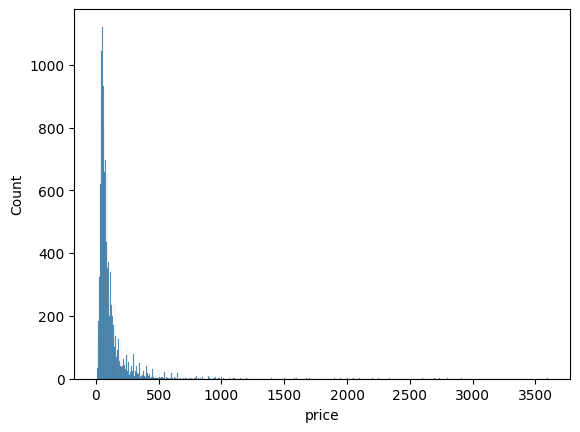

In [10]:
print("Mean of price column",df['price'].mean())
print("Median of price column",df['price'].median())
sns.histplot(df['price']);

we can use some technique to convert this columns as normally distributed

area_type

area_type
Super built-up  Area    8789
Built-up  Area          2418
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64


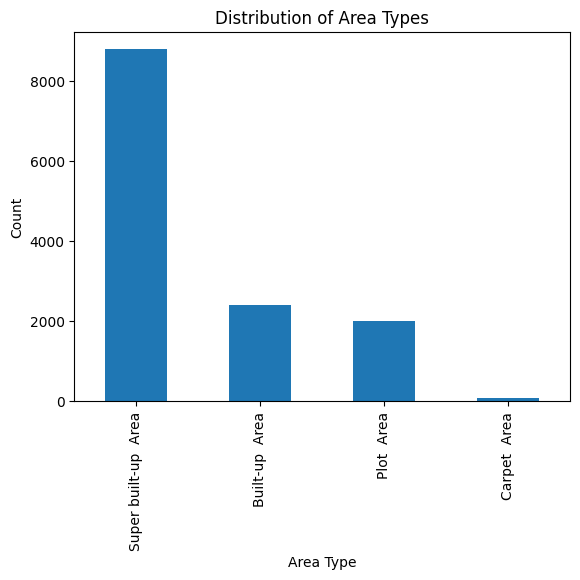

In [11]:

print(df['area_type'].value_counts())

df['area_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

Most of flates are belongs to Super built-up  Areas.

availability

availability
Ready To Move    10580
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 80, dtype: int64


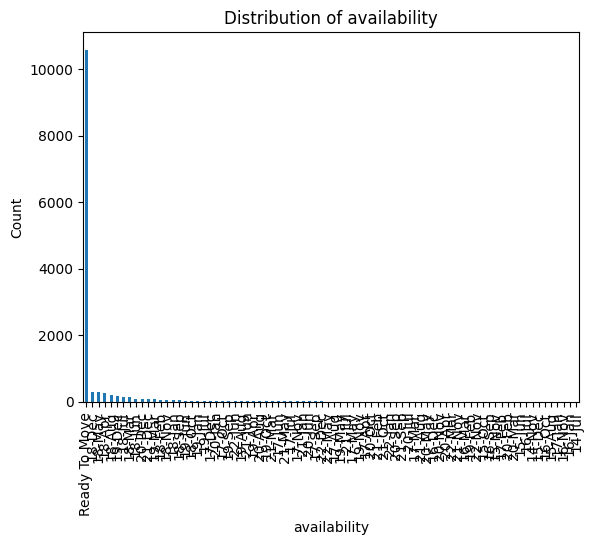

In [12]:
print(df['availability'].value_counts())

df['availability'].value_counts().plot(kind='bar')
plt.title('Distribution of availability')
plt.xlabel('availability')
plt.ylabel('Count')
plt.show()

In [13]:
df.drop(columns = ['availability'],inplace=True)


In [14]:
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price', 'bhk'],
      dtype='object')

In [15]:
print(df['location'].value_counts().count())

1304


In [16]:
print(df['size'].value_counts().count())
df['size'].value_counts()

31


size
2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13303 non-null  object 
 1   location    13303 non-null  object 
 2   size        13303 non-null  object 
 3   total_sqft  13303 non-null  object 
 4   bath        13303 non-null  float64
 5   balcony     13303 non-null  float64
 6   price       13303 non-null  float64
 7   bhk         13303 non-null  int32  
dtypes: float64(3), int32(1), object(4)
memory usage: 883.4+ KB


In [18]:
def convertRange(x):
  temp = x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [19]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

C:\Users\aakas\AppData\Local\Temp\ipykernel_9808\2710400549.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x='total_sqft',palette = 'pastel')


<Axes: xlabel='total_sqft', ylabel='Density'>

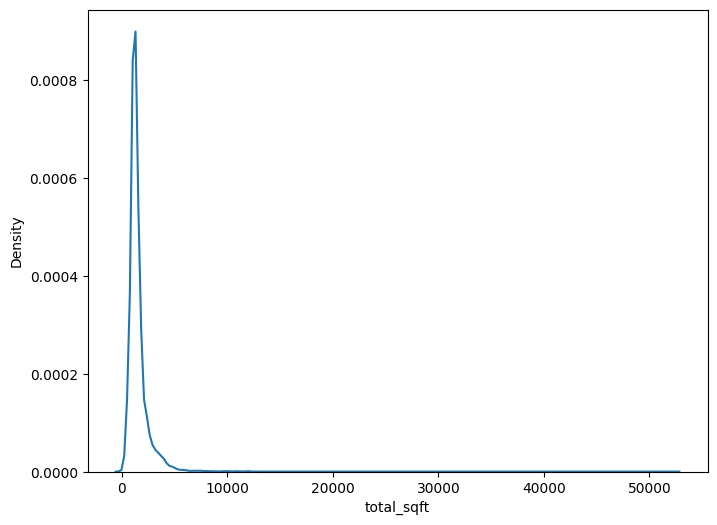

In [20]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df,x='total_sqft',palette = 'pastel')

C:\Users\aakas\AppData\Local\Temp\ipykernel_9808\1082038796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='total_sqft',palette = 'pastel')


<Axes: xlabel='total_sqft'>

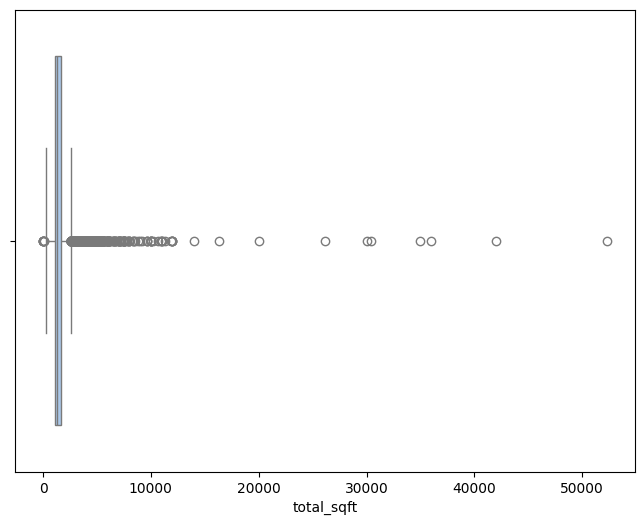

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,x='total_sqft',palette = 'pastel')

In [22]:
df['sqrt_per_BHK'] = df['total_sqft']/df['bhk']


In [23]:
df['Price_per_square_feet'] = df['price']*100000 / df['total_sqft']
df['Price_per_square_feet']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: Price_per_square_feet, Length: 13303, dtype: float64

In [24]:
data = df[((df['total_sqft']/df['bhk'])>=300)]
data.describe()

,total_sqft,bath,balcony,price,bhk,sqrt_per_BHK,Price_per_square_feet
count,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000
mean,1593.745883,2.560217,1.604092,111.400362,2.651642,597.142081,6307.441644
std,1261.402072,1.078477,0.796646,152.104715,0.977059,386.999175,4160.931610
min,300.000000,1.000000,0.000000,9.000000,1.000000,300.000000,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,492.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,562.500000,5295.007564
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,630.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,26136.000000,176470.588235


In [25]:
df['location'].value_counts()

location
Whitefield           539
Sarjapur  Road       397
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [26]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()
location_count

location
Whitefield                        540
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [27]:
location_count_less_10 = location_count[location_count<10]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [28]:
df['location'].value_counts()

location
other                  2752
Whitefield              540
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: count, Length: 255, dtype: int64

Removing Outliers(location, BHK)

In [29]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.Price_per_square_feet)
    st = np.std(subdf.Price_per_square_feet)

    gen_df = subdf[(subdf.Price_per_square_feet > (m-st))&(subdf.Price_per_square_feet <= (m+st))]
    df_output = pd.concat([df_output,gen_df],ignore_index = True)
  return df_output
df = remove_outliers_sqft(df)

In [31]:
# BHK Outliers :
def bhk_outlier_remove(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.Price_per_square_feet)
          ,'std':np.std(bhk_df.Price_per_square_feet)
          ,'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Price_per_square_feet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [32]:
df = bhk_outlier_remove(df)

C:\Users\aakas\AppData\Local\Temp\ipykernel_9808\1106068032.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x='price',palette = 'pastel')


<Axes: xlabel='price', ylabel='Density'>

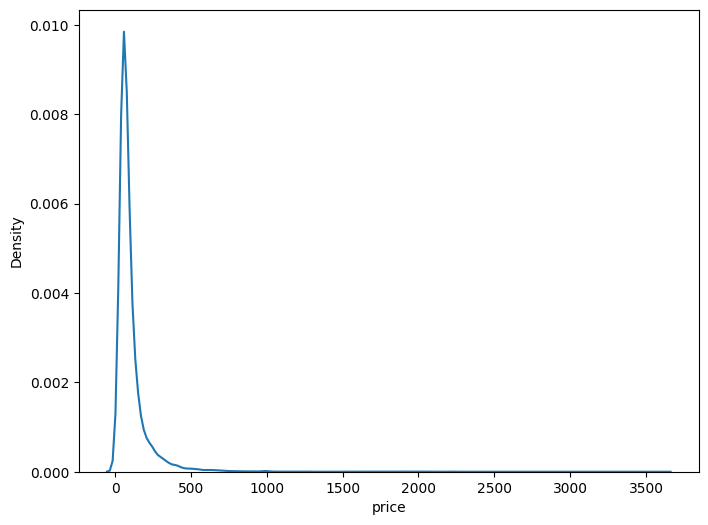

In [33]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df,x='price',palette = 'pastel')

C:\Users\aakas\AppData\Local\Temp\ipykernel_9808\3465334373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='price',palette = 'pastel')


<Axes: xlabel='price'>

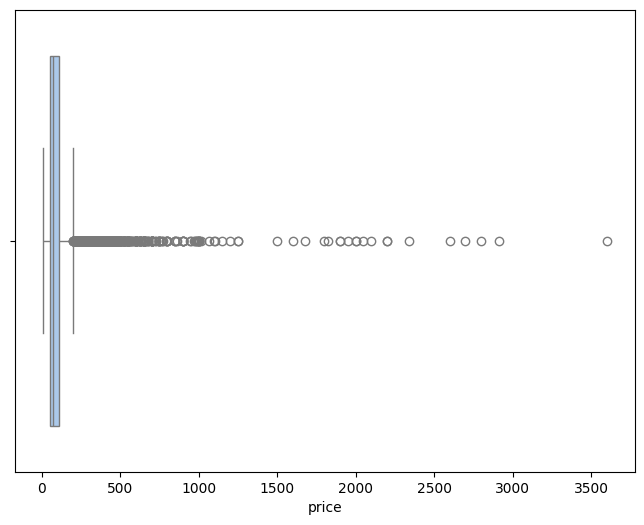

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,x='price',palette = 'pastel')

<Figure size 800x600 with 0 Axes>

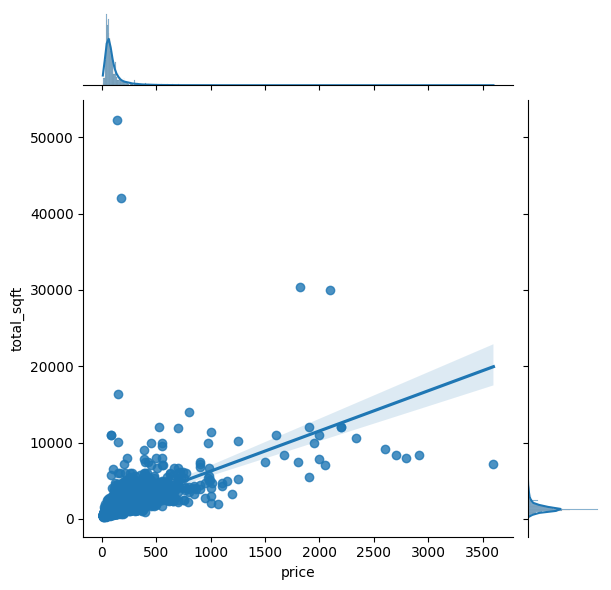

In [35]:
plt.figure(figsize=(8, 6))
sns.jointplot(data=df,y='total_sqft',x='price',kind='reg')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11436 entries, 0 to 11435
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area_type              11436 non-null  object 
 1   location               11436 non-null  object 
 2   size                   11436 non-null  object 
 3   total_sqft             11436 non-null  float64
 4   bath                   11436 non-null  float64
 5   balcony                11436 non-null  float64
 6   price                  11436 non-null  float64
 7   bhk                    11436 non-null  int32  
 8   sqrt_per_BHK           11436 non-null  float64
 9   Price_per_square_feet  11436 non-null  float64
dtypes: float64(6), int32(1), object(3)
memory usage: 848.9+ KB


In [37]:
df.sample(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,sqrt_per_BHK,Price_per_square_feet
6616,Super built-up Area,Sarjapur Road,3 BHK,1476.0,2.0,2.0,98.94,3,492.000000,6703.252033
7865,Super built-up Area,Whitefield,2 BHK,1116.0,2.0,1.0,51.91,2,558.000000,4651.433692
8453,Super built-up Area,Yelahanka,2 BHK,1274.0,2.0,2.0,48.42,2,637.000000,3800.627943
1730,Super built-up Area,Chandapura,3 BHK,971.0,2.0,2.0,38.00,3,323.666667,3913.491246
1265,Built-up Area,Bellandur,2 BHK,1465.0,3.0,3.0,90.00,2,732.500000,6143.344710
132,Super built-up Area,7th Phase JP Nagar,2 BHK,1100.0,2.0,0.0,46.00,2,550.000000,4181.818182
10647,Built-up Area,other,2 BHK,900.0,2.0,1.0,24.00,2,450.000000,2666.666667
36,Super built-up Area,2nd Phase Judicial Layout,2 BHK,1150.0,2.0,1.0,40.25,2,575.000000,3500.000000
905,Plot Area,Banjara Layout,3 Bedroom,2500.0,4.0,0.0,140.00,3,833.333333,5600.000000
4754,Built-up Area,Kengeri,3 BHK,1470.0,3.0,3.0,50.00,3,490.000000,3401.360544


In [38]:
df.drop(columns = ['size'],inplace = True, axis = 1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11436 entries, 0 to 11435
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area_type              11436 non-null  object 
 1   location               11436 non-null  object 
 2   total_sqft             11436 non-null  float64
 3   bath                   11436 non-null  float64
 4   balcony                11436 non-null  float64
 5   price                  11436 non-null  float64
 6   bhk                    11436 non-null  int32  
 7   sqrt_per_BHK           11436 non-null  float64
 8   Price_per_square_feet  11436 non-null  float64
dtypes: float64(6), int32(1), object(2)
memory usage: 759.5+ KB


In [39]:
X_train, X_test, y_train, y_test= train_test_split(df.drop(columns = ['price'],axis = 1),
                                                                            df['price'],
                                                                             test_size=0.2,
                                                                              random_state=42)

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train= encoder1.fit_transform(X_train)
X_test= encoder1.transform(X_test)

In [41]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [45]:
predicted_values=model.predict(X_test)
result_mse = mean_squared_error(y_test, predicted_values)
result_mae = mean_absolute_error(y_test, predicted_values)

print("MSE :", result_mse)
print("MAE :", result_mae)


MSE : 12702.724079620146
MAE : 40.994589048127615
